# 🏔️🚢Titanic - Machine Learning from Disaster

## ⬇️Import Packages

In [1]:
using Revise
using Projekt_mlynatom
using DataFrames
using StatsPlots
using Plots
using Flux
using Flux: crossentropy
using Statistics

## Load and visualize train dataset

In [5]:
df = read_csv_to_df("../data/train.csv")

Row,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,Int64,Int64,Int64,String,String7,Float64?,Int64,Int64,String31,Float64,String15,String1
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,missing,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,missing,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,missing,S
6,6,0,3,"Moran, Mr. James",male,missing,0,0,330877,8.4583,missing,Q
7,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,missing,S
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,missing,S


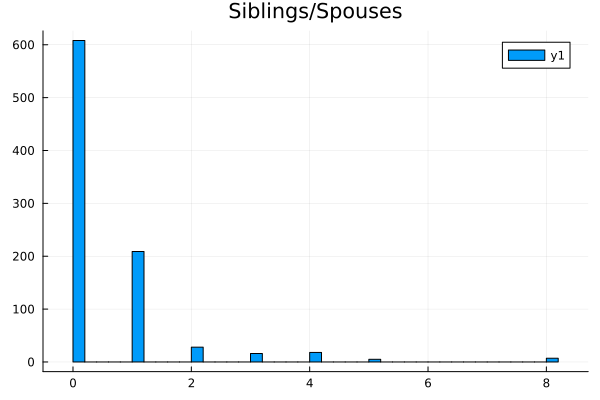

In [11]:
@df df histogram(:SibSp, title="Siblings/Spouses")

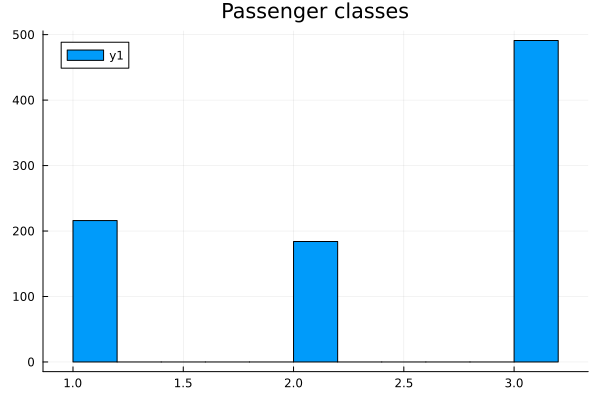

In [7]:
@df df histogram(:Pclass, title="Passenger classes")

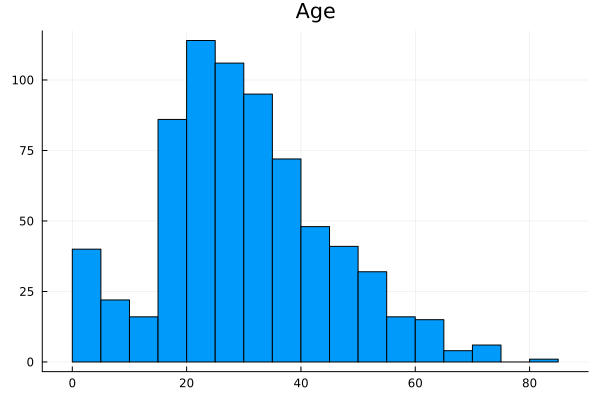

In [8]:
@df df histogram(:Age, title="Age", legend=false)

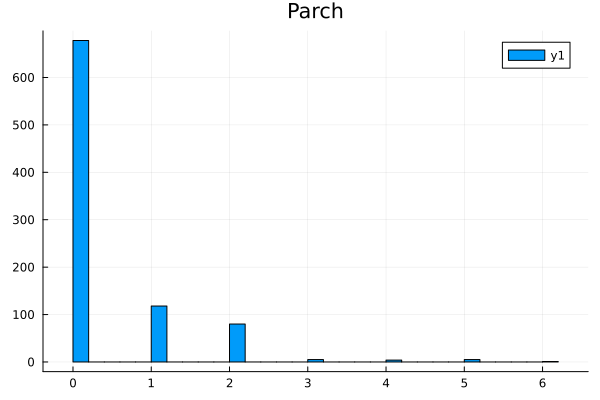

In [9]:
@df df histogram(:Parch, title="Parch")

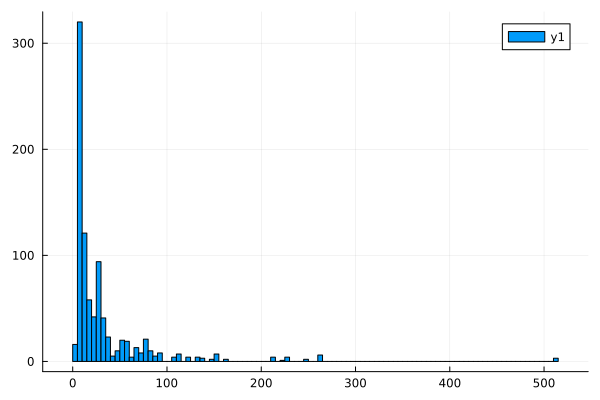

In [10]:
@df df histogram(:Fare)

In [12]:
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,PassengerId,446.0,1,446.0,891,0,Int64
2,Survived,0.383838,0,0.0,1,0,Int64
3,Pclass,2.30864,1,3.0,3,0,Int64
4,Name,,"Abbing, Mr. Anthony",,"van Melkebeke, Mr. Philemon",0,String
5,Sex,,female,,male,0,String7
6,Age,29.6991,0.42,28.0,80.0,177,"Union{Missing, Float64}"
7,SibSp,0.523008,0,0.0,8,0,Int64
8,Parch,0.381594,0,0.0,6,0,Int64
9,Ticket,,110152,,WE/P 5735,0,String31


## Fill missing data in the train dataset

### Missing age

In [13]:
fill_missing_age!(df)

In [14]:
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,PassengerId,446.0,1,446.0,891,0,Int64
2,Survived,0.383838,0,0.0,1,0,Int64
3,Pclass,2.30864,1,3.0,3,0,Int64
4,Name,,"Abbing, Mr. Anthony",,"van Melkebeke, Mr. Philemon",0,String
5,Sex,,female,,male,0,String7
6,Age,29.3829,0.42,27.0,80.0,0,"Union{Missing, Float64}"
7,SibSp,0.523008,0,0.0,8,0,Int64
8,Parch,0.381594,0,0.0,6,0,Int64
9,Ticket,,110152,,WE/P 5735,0,String31


### Missing embarked

count occurences of each ports and select the one with most occurences

In [17]:
count_all(df.Embarked)

Dict{Any, Any} with 4 entries:
  :Q       => 77
  :S       => 644
  :missing => 2
  :C       => 168

In [18]:
fill_missing_embarked!(df, "S")

In [19]:
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,PassengerId,446.0,1,446.0,891,0,Int64
2,Survived,0.383838,0,0.0,1,0,Int64
3,Pclass,2.30864,1,3.0,3,0,Int64
4,Name,,"Abbing, Mr. Anthony",,"van Melkebeke, Mr. Philemon",0,String
5,Sex,,female,,male,0,String7
6,Age,29.3829,0.42,27.0,80.0,0,"Union{Missing, Float64}"
7,SibSp,0.523008,0,0.0,8,0,Int64
8,Parch,0.381594,0,0.0,6,0,Int64
9,Ticket,,110152,,WE/P 5735,0,String31


### Create titles

In [21]:
unique_titles = count_all(df.Titles)

Dict{Any, Any} with 9 entries:
  Symbol("Mrs.")    => 125
  Symbol("Dr.")     => 7
  Symbol("Ms.")     => 1
  Symbol("Mr.")     => 517
  Symbol("Rev.")    => 6
  Symbol("Rare.")   => 11
  Symbol("Col.")    => 2
  Symbol("Master.") => 40
  Symbol("Miss.")   => 182

In [20]:
least_occuring_titles = ["Countess.", "Sir.", "Lady.", "Mlle.", "Mme.", "Don.", "Jonkheer.", "Capt.", "Major.", "Dona."]
add_titles!(df, least_occuring_titles)

In [22]:
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,PassengerId,446.0,1,446.0,891,0,Int64
2,Survived,0.383838,0,0.0,1,0,Int64
3,Pclass,2.30864,1,3.0,3,0,Int64
4,Name,,"Abbing, Mr. Anthony",,"van Melkebeke, Mr. Philemon",0,String
5,Sex,,female,,male,0,String7
6,Age,29.3829,0.42,27.0,80.0,0,"Union{Missing, Float64}"
7,SibSp,0.523008,0,0.0,8,0,Int64
8,Parch,0.381594,0,0.0,6,0,Int64
9,Ticket,,110152,,WE/P 5735,0,String31


## Prepare training data

In [23]:
dummy_cols = [:Sex, :Pclass, :Embarked, :Titles]
X_cols = [:Age, :SibSp, :Parch, :Fare]
X, y = prepare_data(df, dummy_cols, X_cols, :Survived)

(Float32[22.0 1.0 … 0.0 0.0; 38.0 1.0 … 0.0 0.0; … ; 26.0 0.0 … 0.0 0.0; 32.0 0.0 … 0.0 0.0], [0, 1, 1, 1, 0, 0, 0, 0, 1, 1  …  0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

## Load and visualize test data

In [25]:
df_test = read_csv_to_df("../data/test.csv")

Row,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,Int64,Int64,String,String7,Float64?,Int64,Int64,String31,Float64?,String15,String1
1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,missing,Q
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0,missing,S
3,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,missing,Q
4,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,missing,S
5,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,missing,S
6,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.225,missing,S
7,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,missing,Q
8,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0,missing,S
9,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,missing,C


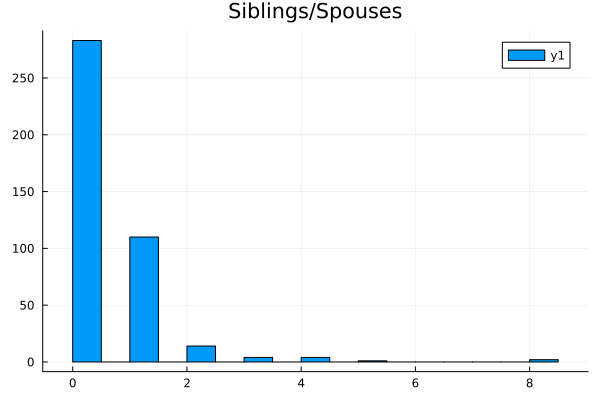

In [30]:
@df df_test histogram(:SibSp, title="Siblings/Spouses")

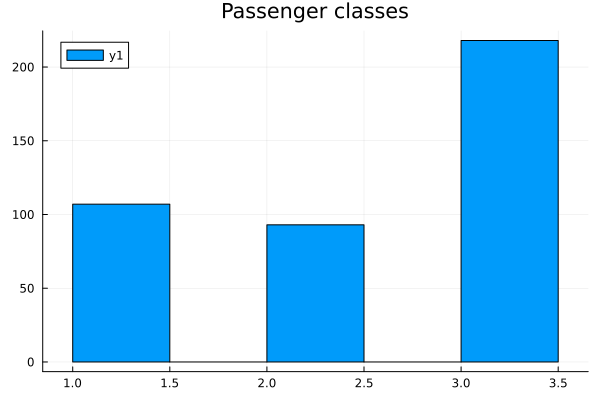

In [29]:
@df df_test histogram(:Pclass, title="Passenger classes")

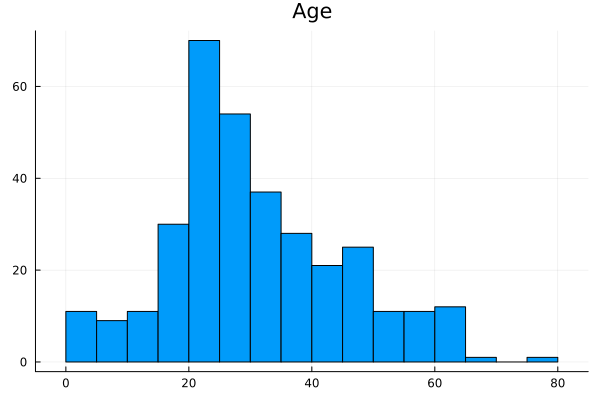

In [31]:
@df df_test histogram(:Age, title="Age", legend=false)

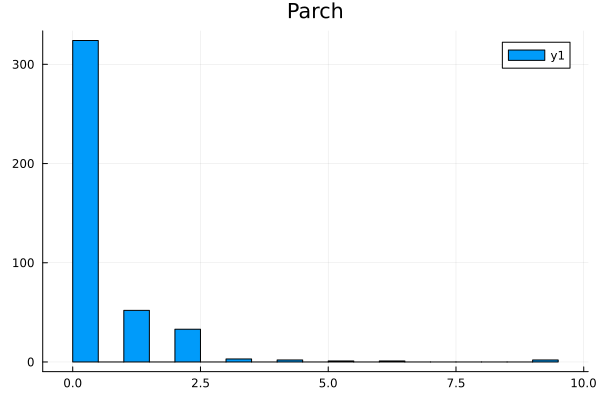

In [32]:
@df df_test histogram(:Parch, title="Parch")

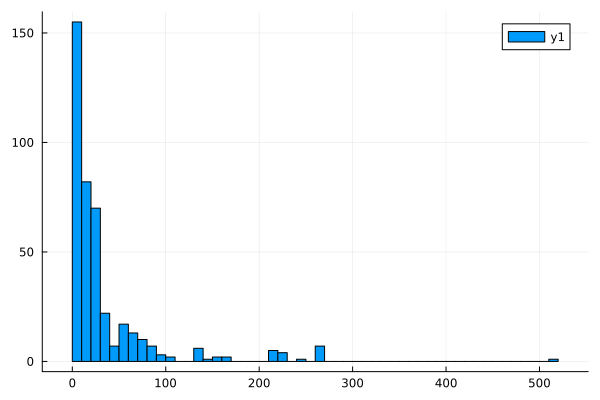

In [33]:
@df df_test histogram(:Fare)

In [26]:
describe(df_test)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,PassengerId,1100.5,892,1100.5,1309,0,Int64
2,Pclass,2.26555,1,3.0,3,0,Int64
3,Name,,"Abbott, Master. Eugene Joseph",,"van Billiard, Master. Walter John",0,String
4,Sex,,female,,male,0,String7
5,Age,30.2726,0.17,27.0,76.0,86,"Union{Missing, Float64}"
6,SibSp,0.447368,0,0.0,8,0,Int64
7,Parch,0.392344,0,0.0,9,0,Int64
8,Ticket,,110469,,W.E.P. 5734,0,String31
9,Fare,35.6272,0.0,14.4542,512.329,1,"Union{Missing, Float64}"


## Fill missing data in the test dataset

### Missing fare

In [34]:
findall(.!completecases(df_test, :Fare))

1-element Vector{Int64}:
 153

with missing fare -> Embarked: S, Pclass: 3 -> Fare -> mean

In [35]:
df_test[153, :]

Row,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,Int64,Int64,String,String7,Float64?,Int64,Int64,String31,Float64?,String15,String1
153,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,missing,missing,S


In [36]:
fare_mean = compute_fare_mean("S", 3, df_test)

13.913029787234045

In [37]:
df_test[153, :Fare] = fare_mean

13.913029787234045

In [38]:
describe(df_test)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,PassengerId,1100.5,892,1100.5,1309,0,Int64
2,Pclass,2.26555,1,3.0,3,0,Int64
3,Name,,"Abbott, Master. Eugene Joseph",,"van Billiard, Master. Walter John",0,String
4,Sex,,female,,male,0,String7
5,Age,30.2726,0.17,27.0,76.0,86,"Union{Missing, Float64}"
6,SibSp,0.447368,0,0.0,8,0,Int64
7,Parch,0.392344,0,0.0,9,0,Int64
8,Ticket,,110469,,W.E.P. 5734,0,String31
9,Fare,35.5752,0.0,14.4542,512.329,0,"Union{Missing, Float64}"


### Missing age

In [39]:
fill_missing_age!(df_test)

In [40]:
describe(df_test)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,PassengerId,1100.5,892,1100.5,1309,0,Int64
2,Pclass,2.26555,1,3.0,3,0,Int64
3,Name,,"Abbott, Master. Eugene Joseph",,"van Billiard, Master. Walter John",0,String
4,Sex,,female,,male,0,String7
5,Age,29.4821,0.17,25.0,76.0,0,"Union{Missing, Float64}"
6,SibSp,0.447368,0,0.0,8,0,Int64
7,Parch,0.392344,0,0.0,9,0,Int64
8,Ticket,,110469,,W.E.P. 5734,0,String31
9,Fare,35.5752,0.0,14.4542,512.329,0,"Union{Missing, Float64}"


### Add titles

In [43]:
count_all(df_test.Titles)

Dict{Any, Any} with 9 entries:
  Symbol("Mrs.")    => 72
  Symbol("Dr.")     => 1
  Symbol("Ms.")     => 1
  Symbol("Mr.")     => 240
  Symbol("Rev.")    => 2
  Symbol("Rare.")   => 1
  Symbol("Col.")    => 2
  Symbol("Master.") => 21
  Symbol("Miss.")   => 78

In [41]:
add_titles!(df_test, least_occuring_titles)

In [42]:
describe(df_test)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,PassengerId,1100.5,892,1100.5,1309,0,Int64
2,Pclass,2.26555,1,3.0,3,0,Int64
3,Name,,"Abbott, Master. Eugene Joseph",,"van Billiard, Master. Walter John",0,String
4,Sex,,female,,male,0,String7
5,Age,29.4821,0.17,25.0,76.0,0,"Union{Missing, Float64}"
6,SibSp,0.447368,0,0.0,8,0,Int64
7,Parch,0.392344,0,0.0,9,0,Int64
8,Ticket,,110469,,W.E.P. 5734,0,String31
9,Fare,35.5752,0.0,14.4542,512.329,0,"Union{Missing, Float64}"


## Prepare test data

In [44]:
X_test = prepare_data(df_test, dummy_cols, X_cols)

418×17 Matrix{Float32}:
 34.5  0.0  0.0    7.8292  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 47.0  1.0  0.0    7.0     1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 62.0  0.0  0.0    9.6875  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 27.0  0.0  0.0    8.6625  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 22.0  1.0  1.0   12.2875  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 14.0  0.0  0.0    9.225   0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 30.0  0.0  0.0    7.6292  1.0  0.0     1.0  0.0  0.0  0.0  0.0  0.0  0.0
 26.0  1.0  1.0   29.0     0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 18.0  0.0  0.0    7.2292  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 21.0  2.0  0.0   24.15    0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  ⋮                             ⋮    ⋱  ⋮                        ⋮    
  3.0  1.0  1.0   13.775   1.0  0.0     1.0  0.0  0.0  0.0  0.0  0.0  0.0
 23.0  0.0  0.0    7.75    1.0  0.0  …  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 37.0  1.0  0.0  

## Logistic regression

### standardize

In [45]:
X_stand = standardize(X; dims=1)
X_log = hcat(X_stand, ones(size(X, 1)))

891×18 Matrix{Float64}:
 -0.556769   0.43255   -0.473408  -0.502163   …  -0.0335013  -0.0474046  1.0
  0.649843   0.43255   -0.473408   0.786404      -0.0335013  -0.0474046  1.0
 -0.255116  -0.474279  -0.473408  -0.48858       -0.0335013  -0.0474046  1.0
  0.423603   0.43255   -0.473408   0.420494      -0.0335013  -0.0474046  1.0
  0.423603  -0.474279  -0.473408  -0.486064      -0.0335013  -0.0474046  1.0
 -0.179703  -0.474279  -0.473408  -0.477848   …  -0.0335013  -0.0474046  1.0
  1.85646   -0.474279  -0.473408   0.395591      -0.0335013  -0.0474046  1.0
 -2.06503    2.24621    0.767199  -0.223957      -0.0335013  -0.0474046  1.0
 -0.179703  -0.474279   2.0078    -0.424018      -0.0335013  -0.0474046  1.0
 -1.16008    0.43255   -0.473408  -0.0429314     -0.0335013  -0.0474046  1.0
  ⋮                                           ⋱   ⋮                      
 -0.556769  -0.474279  -0.473408  -0.436426      -0.0335013  -0.0474046  1.0
 -0.104289  -0.474279  -0.473408  -0.436762      -0.033

### Split dataset

In [46]:
X_log_train, y_log_train, X_log_dev, y_log_dev = split_dataset(X_log, y)

([-0.8584219813346863 -0.4742787480354309 … -0.04740458354353905 1.0; -1.7633811235427856 -0.4742787480354309 … -0.04740458354353905 1.0; … ; 0.04653707146644592 -0.4742787480354309 … -0.04740458354353905 1.0; -0.5567689538002014 2.246208429336548 … -0.04740458354353905 1.0], [1, 1, 0, 0, 0, 1, 1, 0, 1, 0  …  0, 0, 1, 1, 0, 1, 0, 0, 0, 0], [0.12195032835006714 0.4325503408908844 … -0.04740458354353905 1.0; -0.5567689538002014 0.4325503408908844 … -0.04740458354353905 1.0; … ; -0.25511595606803894 -0.4742787480354309 … -0.04740458354353905 1.0; 0.19736358523368835 -0.4742787480354309 … -0.04740458354353905 1.0], [0, 1, 1, 1, 0, 1, 0, 0, 0, 1  …  1, 0, 1, 0, 0, 0, 0, 1, 1, 1])

### find best $\lambda$

In [47]:
best_λ = get_best_λ(X_log_train, y_log_train, X_log_dev, y_log_dev)

0.0

### compute regression

In [48]:
w = logistic_regression(X_log, y; max_iter = 100000, λ=0)

18-element Vector{Float64}:
 -0.40714209677123175
 -0.6235188749143041
 -0.28358313685095315
  0.17173167002348444
  1.3518941270927793
  0.9601124300674805
  0.46152999841536985
  0.15236309382327362
  0.08012795059368037
  0.31306646978124697
  0.03027769064142134
  0.7191614823270809
  0.03376042818964119
 -0.41919052228414705
  0.02834568807301854
  0.19768798969516502
  0.041648050333311565
 -0.7097060604139528

In [49]:
preds = predict(X_log, w)

891-element BitVector:
 0
 1
 1
 1
 0
 0
 0
 0
 1
 1
 ⋮
 1
 0
 0
 0
 0
 1
 0
 1
 0

In [50]:
error = compute_class_error(y, preds)

0.16498316498316498

In [51]:
accuracy(w, X_log, y)

0.835016835016835

## Neural networks

### Split dataset

In [53]:
X_train, y_train, X_dev, y_dev = split_dataset(X, y; dev_ratio=0.1)

(Float32[32.0 0.0 … 0.0 0.0; 41.0 0.0 … 0.0 0.0; … ; 33.0 0.0 … 0.0 0.0; 20.0 0.0 … 0.0 0.0], [0, 0, 0, 1, 0, 0, 0, 1, 0, 1  …  0, 0, 1, 1, 0, 0, 0, 1, 0, 0], Float32[18.0 0.0 … 0.0 0.0; 31.0 1.0 … 0.0 0.0; … ; 58.0 0.0 … 0.0 0.0; 21.0 0.0 … 0.0 0.0], [0, 0, 1, 0, 0, 0, 0, 0, 1, 0  …  0, 1, 0, 1, 1, 0, 0, 0, 1, 0])

### Standardize

In [54]:
X_train, X_dev = standardize(X_train', X_dev'; dims=2)

y_train = categorical_to_one_hot(y_train)'
y_dev = categorical_to_one_hot(y_dev)'

2×89 adjoint(::Matrix{Bool}) with eltype Bool:
 1  1  0  1  1  1  1  1  0  1  1  1  0  …  0  0  1  0  1  0  0  1  1  1  0  1
 0  0  1  0  0  0  0  0  1  0  0  0  1     1  1  0  1  0  1  1  0  0  0  1  0

### define network

In [55]:
my_network = Chain(
    Dense(size(X_train, 1) => 32, relu),
    Dropout(0.2),
    Dense(32 => 32, relu),
    BatchNorm(32),
    Dropout(0.2),
    Dense(32 => size(y_train, 1), identity),
    softmax,
)

Chain(
  Dense(17 => 32, relu),                # 576 parameters
  Dropout(0.2),
  Dense(32 => 32, relu),                # 1_056 parameters
  BatchNorm(32),                        # 64 parameters, plus 64
  Dropout(0.2),
  Dense(32 => 2),                       # 66 parameters
  NNlib.softmax,
)         # Total: 8 trainable arrays, 1_762 parameters,
          # plus 2 non-trainable, 64 parameters, summarysize 7.797 KiB.

### train!

In [56]:
loss(X, y) = crossentropy(my_network(X), y)
opt = Adam(0.0001)
n_epochs = 1000
acc_test, acc_train, Ls = train_nn!(my_network, loss, X_train, y_train, X_dev, y_dev; opt=opt, n_epochs=n_epochs, batchsize=1)

([0.6292134831460674, 0.6741573033707865, 0.7191011235955056, 0.6741573033707865, 0.6741573033707865, 0.6741573033707865, 0.6629213483146067, 0.7415730337078652, 0.6741573033707865, 0.6629213483146067  …  0.6966292134831461, 0.6741573033707865, 0.7303370786516854, 0.6179775280898876, 0.7191011235955056, 0.7191011235955056, 0.7078651685393258, 0.7078651685393258, 0.6741573033707865, 0.7078651685393258], [0.669576059850374, 0.6982543640897756, 0.6845386533665836, 0.6508728179551122, 0.6645885286783042, 0.6471321695760599, 0.6783042394014963, 0.6433915211970075, 0.6733167082294265, 0.6658354114713217  …  0.669576059850374, 0.64214463840399, 0.6571072319201995, 0.6496259351620948, 0.6770573566084788, 0.6508728179551122, 0.6508728179551122, 0.6795511221945137, 0.6583541147132169, 0.6608478802992519], [0.7647798657417297, 0.8144263625144958, 0.8044264912605286, 0.8638129234313965, 0.8604763150215149, 0.8600051999092102, 0.8632028102874756, 0.8879782557487488, 0.8144707679748535, 0.8082593679

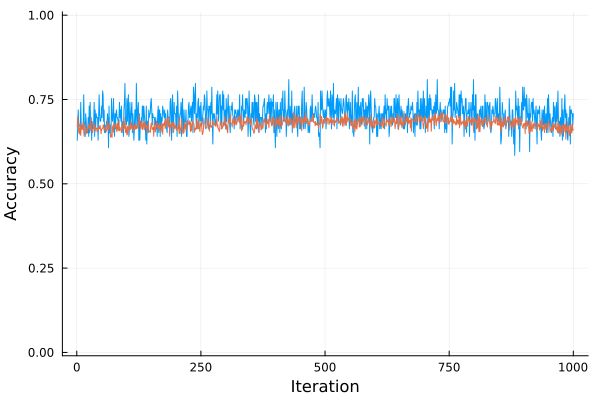

In [61]:
plot(acc_test, xlabel="Iteration", ylabel="Accuracy", label="", ylim=(-0.01, 1.01))
plot!(acc_train, label="", ylim=(-0.01, 1.01))

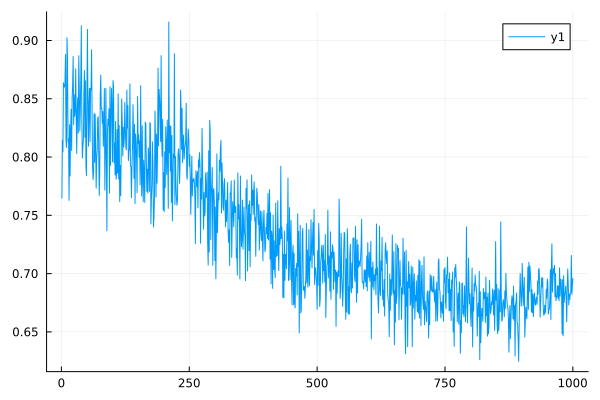

In [58]:
plot(Ls)

In [59]:
accuracy(my_network, X_dev, y_dev; dims=2)

0.6292134831460674

In [60]:
accuracy(my_network, X_train, y_train; dims=2)

0.614713216957606

## Test evaluation and comparing

### Logreg

In [62]:
X_test_std = standardize(X_test; dims=1)
X_log_test = hcat(X_test_std, ones(size(X_test, 1)))

418×18 Matrix{Float64}:
  0.387475   -0.498872  -0.399769  -0.49679   …  -0.0489116  -0.0489116  1.0
  1.3527      0.616254  -0.399769  -0.511637     -0.0489116  -0.0489116  1.0
  2.51097    -0.498872  -0.399769  -0.463518     -0.0489116  -0.0489116  1.0
 -0.191659   -0.498872  -0.399769  -0.48187      -0.0489116  -0.0489116  1.0
 -0.577749    0.616254   0.619154  -0.416965     -0.0489116  -0.0489116  1.0
 -1.19549    -0.498872  -0.399769  -0.471799  …  -0.0489116  -0.0489116  1.0
  0.0399944  -0.498872  -0.399769  -0.500371     -0.0489116  -0.0489116  1.0
 -0.268877    0.616254   0.619154  -0.117729     -0.0489116  -0.0489116  1.0
 -0.886621   -0.498872  -0.399769  -0.507533     -0.0489116  -0.0489116  1.0
 -0.654967    1.73138   -0.399769  -0.204568     -0.0489116  -0.0489116  1.0
  ⋮                                           ⋱   ⋮                      
 -2.04489     0.616254   0.619154  -0.390331     -0.0489116  -0.0489116  1.0
 -0.500531   -0.498872  -0.399769  -0.498208  …  -0.048

In [63]:
test_preds_logreg = predict(X_log_test, w)

418-element BitVector:
 0
 0
 0
 0
 1
 0
 1
 0
 1
 0
 ⋮
 1
 1
 1
 1
 0
 1
 0
 0
 0

### NN

In [64]:
X_nn_test = standardize(X_test; dims=1)

418×17 Matrix{Float32}:
  0.387475   -0.498872  -0.399769  …  -0.0692545  -0.0489116  -0.0489116
  1.3527      0.616254  -0.399769     -0.0692545  -0.0489116  -0.0489116
  2.51097    -0.498872  -0.399769     -0.0692545  -0.0489116  -0.0489116
 -0.191659   -0.498872  -0.399769     -0.0692545  -0.0489116  -0.0489116
 -0.577749    0.616254   0.619154     -0.0692545  -0.0489116  -0.0489116
 -1.19549    -0.498872  -0.399769  …  -0.0692545  -0.0489116  -0.0489116
  0.0399944  -0.498872  -0.399769     -0.0692545  -0.0489116  -0.0489116
 -0.268877    0.616254   0.619154     -0.0692545  -0.0489116  -0.0489116
 -0.886621   -0.498872  -0.399769     -0.0692545  -0.0489116  -0.0489116
 -0.654967    1.73138   -0.399769     -0.0692545  -0.0489116  -0.0489116
  ⋮                                ⋱               ⋮          
 -2.04489     0.616254   0.619154     -0.0692545  -0.0489116  -0.0489116
 -0.500531   -0.498872  -0.399769  …  -0.0692545  -0.0489116  -0.0489116
  0.58052     0.616254  -0.399769    

In [65]:
test_preds_nn = predict(X_nn_test', my_network; dims=2)

418-element Vector{Int64}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0

### Compare

### Save

In [ ]:
#save_my_submission(test_preds_nn, df_test.PassengerId)
save_my_submission(test_preds_logreg, df_test.PassengerId)